In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit

In [2]:
from getpeak import do_analysis

In [3]:
emission_th = {
    "Na" : [0.511,1.28], # in MeV
    "Cs" : [0.6616],
    "Co" : [1.17,1.33],
    "Mn" : [0.84]
}

In [21]:
def calibrate(file_list,show_plot=True):
    calib_coeff_loc = [] # raw x value at which calib_coeff_val is calculated
    calib_coeff_val = [] # = expected / observed
    for file in file_list:
        # determine the element from the file name
        element = 'unknown'
        for elem in ['Na','Cs','Co','Mn']:
            if not file.find(elem) == -1:
                emission_lines = emission_th[elem]
                element = elem   
        params = do_analysis(file,sampling=30,N_peak_search=len(emission_lines),show_plot=show_plot)
        for emission_line, param in zip(emission_lines, params):
            peak_observed = param[1] # value of mu
            peak_expected = emission_line
            calib_coeff_loc.append(peak_observed)
            calib_coeff_val.append(peak_expected/peak_observed)
    return calib_coeff_loc, calib_coeff_val

In [25]:
data_550v = [
    'data/Co_5min_coarse=32_fine=2.5_g0=3.5_550V.dat',
    'data/Mn_5min_coarse=32_fine=2.5_g0=3.5_550V.dat',
    'data/Cs_5min_coarse=32_fine=2.5_g0=3.5_550V.dat',
    'data/Na_5min_coarse=32_fine=2.5_g0=3.5_550V.dat'
]
data_600v = [
    'data/Co_5min_coarse=32_fine=2.5_g0=3.5_600V.dat',
    'data/Mn_5min_coarse=32_fine=2.5_g0=3.5_600V.dat',
    'data/Cs_5min_coarse=32_fine=2.5_g0=3.5_600V.dat',
    'data/Na_5min_coarse=32_fine=2.5_g0=3.5_600V.dat'
]
data_650v = [
    'data/Co_5min_coarse=32_fine=2.5_g0=2.5.dat',
    'data/Mn_5min_coarse=32_fine=2.5_g0=2.5.dat',
    'data/Cs_5min_coarse=32_fine=2.5_g0=2.5.dat',
    'data/Na_5min_coarse=32_fine=2.5_g0=2.5.dat'
]

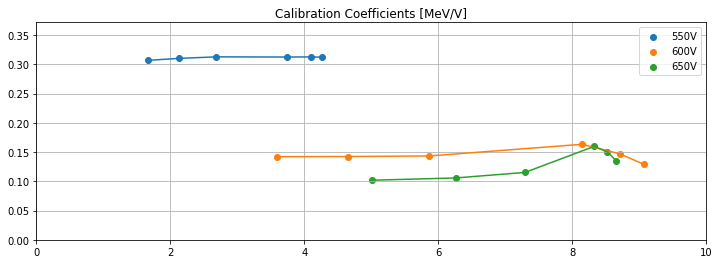

In [53]:
titles = ['550V','600V','650V']
dataset_list = [data_550v,data_600v,data_650v]

plt.figure(figsize=(12,4))
for dataset, title in zip(dataset_list,titles):
    loc, val = calibrate(dataset,show_plot=False)
    val = np.take(val,np.argsort(loc))
    loc = np.take(loc,np.argsort(loc))
    plt.scatter(loc,val,label=title)
    plt.plot(loc,val)
plt.legend()
plt.xlim(0,10)
_,top = plt.ylim()
plt.ylim(0,top*1.1)
plt.grid()
plt.title('Calibration Coefficients [MeV/V]')
plt.show()

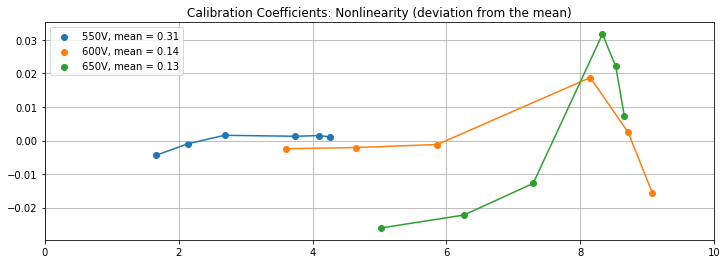

In [55]:
plt.figure(figsize=(12,4))
for dataset, title in zip(dataset_list,titles):
    loc, val = calibrate(dataset,show_plot=False)
    val = np.take(val,np.argsort(loc))
    loc = np.take(loc,np.argsort(loc))
    val_dev = val - np.mean(val)
    plt.scatter(loc,val_dev,label=title+", mean = {:.2f}".format(np.mean(val)))
    plt.plot(loc,val_dev)
plt.legend()
plt.xlim(0,10)
plt.grid()
plt.title('Calibration Coefficients: Nonlinearity (deviation from the mean)')
plt.show()